# 🎓 Week 12 - Day 2: Recurrent Neural Networks (RNNs)

## Today's Goals:
✅ Understand sequential data and time dependencies

✅ Build RNN from scratch to understand internals

✅ Implement RNN in PyTorch for real tasks

✅ Generate text using character-level RNN

---

## 🔧 Part 1: Setup - Install & Import All Libraries

**IMPORTANT:** Run these cells in order!

In [1]:
# STEP 1: Install PyTorch and other packages
print("📦 Installing required packages...\n")
!pip install -q torch torchvision numpy pandas matplotlib seaborn
print("\n✅ All packages installed successfully!")

📦 Installing required packages...


✅ All packages installed successfully!


In [2]:
# STEP 2: Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

print("✅ All libraries imported successfully!")
print(f"🔥 PyTorch version: {torch.__version__}")

✅ All libraries imported successfully!
🔥 PyTorch version: 2.9.1+cpu


In [3]:
# STEP 3: Set random seeds and device
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Setup complete!")
print(f"🖥️  Device: {device}")
print(f"🎲 Random seeds set to 42")
print("🚀 Ready to build RNNs!")

✅ Setup complete!
🖥️  Device: cpu
🎲 Random seeds set to 42
🚀 Ready to build RNNs!


## 📊 Part 2: Understanding Sequential Data

Why does order matter in sequences?

In [4]:
# Example 1: Word order matters!
print("="*80)
print("📝 EXAMPLE 1: WORD ORDER MATTERS\n")

sentence1 = ["I", "love", "AI"]
sentence2 = ["AI", "love", "I"]  # Same words, different order
sentence3 = ["love", "I", "AI"]

print(f"Sentence 1: {' '.join(sentence1)}")
print(f"Sentence 2: {' '.join(sentence2)}")
print(f"Sentence 3: {' '.join(sentence3)}")

print("\n💡 Same words, completely different meanings!")
print("   Traditional ML can't distinguish these - RNNs can!")
print("="*80)

📝 EXAMPLE 1: WORD ORDER MATTERS

Sentence 1: I love AI
Sentence 2: AI love I
Sentence 3: love I AI

💡 Same words, completely different meanings!
   Traditional ML can't distinguish these - RNNs can!



📈 EXAMPLE 2: TIME SERIES DATA



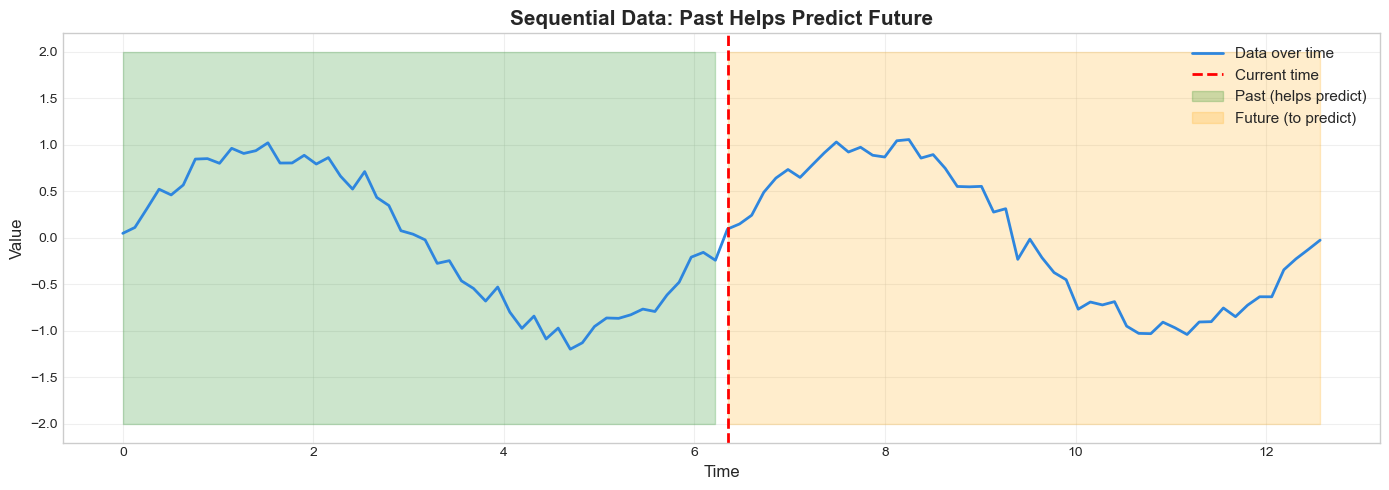


🔑 Key Insight: Previous values help predict future values!
   This is why RNNs have 'memory' - they remember past inputs.


In [5]:
# Example 2: Time series - past predicts future
print("\n📈 EXAMPLE 2: TIME SERIES DATA\n")

# Generate sine wave (simulating data over time)
time_steps = np.linspace(0, 4*np.pi, 100)
values = np.sin(time_steps) + np.random.normal(0, 0.1, 100)

plt.figure(figsize=(14, 5))
plt.plot(time_steps, values, linewidth=2, color='#2E86DE', label='Data over time')
plt.axvline(x=time_steps[50], color='red', linestyle='--', linewidth=2, label='Current time')
plt.fill_between(time_steps[:50], -2, 2, alpha=0.2, color='green', label='Past (helps predict)')
plt.fill_between(time_steps[50:], -2, 2, alpha=0.2, color='orange', label='Future (to predict)')
plt.title('Sequential Data: Past Helps Predict Future', fontsize=15, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔑 Key Insight: Previous values help predict future values!")
print("   This is why RNNs have 'memory' - they remember past inputs.")

In [6]:
# Example 3: Character prediction needs context
print("\n🔤 EXAMPLE 3: CHARACTER SEQUENCES\n")

examples = [
    ("The cat sat on the ma", "t", "mat"),
    ("I love deep learnin", "g", "learning"),
    ("Python is amazin", "g", "amazing"),
    ("Artificial intelligen", "ce", "intelligence"),
]

print("Context helps predict what comes next:\n")
for context, next_char, full_word in examples:
    print(f"Context: '{context}'")
    print(f"  → Next: '{next_char}' (completes '{full_word}')\n")

print("✅ RNNs learn these patterns from context!")
print("   They process sequences step-by-step, remembering what came before.")


🔤 EXAMPLE 3: CHARACTER SEQUENCES

Context helps predict what comes next:

Context: 'The cat sat on the ma'
  → Next: 't' (completes 'mat')

Context: 'I love deep learnin'
  → Next: 'g' (completes 'learning')

Context: 'Python is amazin'
  → Next: 'g' (completes 'amazing')

Context: 'Artificial intelligen'
  → Next: 'ce' (completes 'intelligence')

✅ RNNs learn these patterns from context!
   They process sequences step-by-step, remembering what came before.


### 💡 Key Insights:

✅ **Sequential data** has temporal dependencies

✅ **Order matters** - shuffling destroys meaning

✅ **Context from past** helps predict future

✅ **RNNs are designed** specifically for this!

---

## 🔨 Part 3: Building a Simple RNN from Scratch

Let's implement RNN manually to understand how it works!

In [7]:
class SimpleRNN:
    """
    Simple RNN implementation in NumPy
    
    Forward pass: h_t = tanh(W_xh @ x_t + W_hh @ h_{t-1} + b_h)
    Output: y_t = W_hy @ h_t + b_y
    """
    
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size
        
        # Weight matrices (small random initialization)
        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01  # Input → Hidden
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01  # Hidden → Hidden
        self.W_hy = np.random.randn(output_size, hidden_size) * 0.01  # Hidden → Output
        
        # Bias vectors
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))
        
        print(f"✅ RNN Created!")
        print(f"   Input size: {input_size}")
        print(f"   Hidden size: {hidden_size}")
        print(f"   Output size: {output_size}")
    
    def forward(self, inputs, h_prev):
        """
        Forward pass through time
        
        inputs: list of input vectors
        h_prev: previous hidden state
        
        Returns: outputs (list), final hidden state
        """
        outputs = []
        h = h_prev
        
        # Process sequence step by step
        for t, x in enumerate(inputs):
            # Reshape input
            x = x.reshape(-1, 1)
            
            # Update hidden state: h = tanh(W_xh @ x + W_hh @ h + b_h)
            h = np.tanh(self.W_xh @ x + self.W_hh @ h + self.b_h)
            
            # Compute output: y = W_hy @ h + b_y
            y = self.W_hy @ h + self.b_y
            
            outputs.append(y)
        
        return outputs, h

print("✅ Simple RNN class defined!\n")
print("📐 Key Components:")
print("   • W_xh: Transforms input to hidden state")
print("   • W_hh: Carries hidden state forward (the 'memory')")
print("   • W_hy: Transforms hidden state to output")
print("   • tanh: Activation function (keeps values between -1 and 1)")

✅ Simple RNN class defined!

📐 Key Components:
   • W_xh: Transforms input to hidden state
   • W_hh: Carries hidden state forward (the 'memory')
   • W_hy: Transforms hidden state to output
   • tanh: Activation function (keeps values between -1 and 1)


In [8]:
# Test our simple RNN
print("\n🧪 TESTING SIMPLE RNN\n")
print("="*80)

# Create RNN
input_size = 3
hidden_size = 5
output_size = 2

rnn = SimpleRNN(input_size, hidden_size, output_size)
print()

# Create a sequence of 4 time steps
sequence_length = 4
inputs = [np.random.randn(input_size) for _ in range(sequence_length)]

# Initialize hidden state (zeros)
h_prev = np.zeros((hidden_size, 1))

print(f"\n📊 Processing sequence of length {sequence_length}...")
print(f"   Each input has {input_size} features")
print(f"   Hidden state has {hidden_size} values")
print(f"   Output has {output_size} values\n")

# Forward pass
outputs, final_h = rnn.forward(inputs, h_prev)

print(f"✅ Forward pass complete!\n")
print(f"Results:")
print(f"   Number of outputs: {len(outputs)}")
print(f"   Each output shape: {outputs[0].shape}")
print(f"   Final hidden state shape: {final_h.shape}")
print(f"\n   Output at time step 1: {outputs[0].flatten()[:3].round(3)}...")
print(f"   Output at time step 4: {outputs[-1].flatten()[:3].round(3)}...")

print("\n💡 Notice: RNN processes sequence step-by-step!")
print("   Hidden state carries information forward through time.")
print("="*80)


🧪 TESTING SIMPLE RNN

✅ RNN Created!
   Input size: 3
   Hidden size: 5
   Output size: 2


📊 Processing sequence of length 4...
   Each input has 3 features
   Hidden state has 5 values
   Output has 2 values

✅ Forward pass complete!

Results:
   Number of outputs: 4
   Each output shape: (2, 1)
   Final hidden state shape: (5, 1)

   Output at time step 1: [-0. -0.]...
   Output at time step 4: [-0. -0.]...

💡 Notice: RNN processes sequence step-by-step!
   Hidden state carries information forward through time.


### 💡 Key Insights:

✅ **Hidden state** = RNN's memory (carries info forward)

✅ **Same weights** used at every time step

✅ **Sequential processing** - one step at a time

✅ **tanh activation** keeps values bounded

---

## 🔥 Part 4: RNN in PyTorch - Sequence Prediction

Now let's use PyTorch's built-in RNN for a real task!

In [9]:
# Task: Predict next number in Fibonacci-like sequence
print("📊 TASK: SEQUENCE PREDICTION\n")
print("Pattern: Each number = sum of previous two numbers")
print("Example: [1, 1] → [1, 1, 2] → [1, 1, 2, 3] → [1, 1, 2, 3, 5]\n")

def generate_sequence_data(n_samples=1000, seq_length=5):
    """
    Generate Fibonacci-like sequences
    
    Returns:
    X: sequences (n_samples, seq_length)
    y: next values (n_samples,)
    """
    X, y = [], []
    
    for _ in range(n_samples):
        # Start with two random numbers
        start = [random.random(), random.random()]
        sequence = start.copy()
        
        # Generate sequence
        for _ in range(seq_length):
            next_val = sequence[-1] + sequence[-2]
            sequence.append(next_val)
        
        X.append(sequence[:seq_length])
        y.append(sequence[seq_length])
    
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# Generate data
X_train, y_train = generate_sequence_data(n_samples=1000, seq_length=5)

print(f"✅ Generated {len(X_train)} training sequences\n")
print(f"Data shapes:")
print(f"   X_train: {X_train.shape}  (samples, sequence_length)")
print(f"   y_train: {y_train.shape}  (samples,)")
print(f"\nExample:")
print(f"   Sequence: {X_train[0].round(3)}")
print(f"   Next value: {y_train[0]:.3f}")
print(f"   (Verify: {X_train[0][-1]:.3f} + {X_train[0][-2]:.3f} = {y_train[0]:.3f})")

📊 TASK: SEQUENCE PREDICTION

Pattern: Each number = sum of previous two numbers
Example: [1, 1] → [1, 1, 2] → [1, 1, 2, 3] → [1, 1, 2, 3, 5]

✅ Generated 1000 training sequences

Data shapes:
   X_train: (1000, 5)  (samples, sequence_length)
   y_train: (1000,)  (samples,)

Example:
   Sequence: [0.639 0.025 0.664 0.689 1.354]
   Next value: 2.043
   (Verify: 1.354 + 0.689 = 2.043)


In [10]:
# Define RNN model
class SequenceRNN(nn.Module):
    """
    Simple RNN for sequence prediction
    """
    def __init__(self, input_size=1, hidden_size=32, num_layers=2):
        super(SequenceRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # RNN layer
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # (batch, seq, features)
        )
        
        # Output layer
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward through RNN
        out, _ = self.rnn(x, h0)  # out: (batch, seq, hidden_size)
        
        # Use last time step
        out = self.fc(out[:, -1, :])  # (batch, 1)
        
        return out

# Create model
model = SequenceRNN(input_size=1, hidden_size=32, num_layers=2).to(device)

print("\n✅ RNN MODEL CREATED\n")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Device: {device}")


✅ RNN MODEL CREATED

SequenceRNN(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

Total parameters: 3,265
Device: cpu


In [11]:
# Prepare data for PyTorch
X_train_torch = torch.FloatTensor(X_train).unsqueeze(-1).to(device)  # (batch, seq, 1)
y_train_torch = torch.FloatTensor(y_train).unsqueeze(-1).to(device)  # (batch, 1)

print(f"PyTorch tensors:")
print(f"   X shape: {X_train_torch.shape}  (batch, sequence, features)")
print(f"   y shape: {y_train_torch.shape}  (batch, output)")

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"\n✅ Ready to train!")
print(f"   Loss function: MSE (Mean Squared Error)")
print(f"   Optimizer: Adam (lr=0.001)")

PyTorch tensors:
   X shape: torch.Size([1000, 5, 1])  (batch, sequence, features)
   y shape: torch.Size([1000, 1])  (batch, output)

✅ Ready to train!
   Loss function: MSE (Mean Squared Error)
   Optimizer: Adam (lr=0.001)


In [12]:
# Training loop
print("\n🔥 TRAINING RNN...\n")

epochs = 100
batch_size = 32
losses = []

model.train()

for epoch in range(epochs):
    # Shuffle data
    indices = torch.randperm(len(X_train_torch))
    
    epoch_loss = 0
    num_batches = 0
    
    # Mini-batch training
    for i in range(0, len(X_train_torch), batch_size):
        batch_indices = indices[i:i+batch_size]
        batch_X = X_train_torch[batch_indices]
        batch_y = y_train_torch[batch_indices]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        num_batches += 1
    
    avg_loss = epoch_loss / num_batches
    losses.append(avg_loss)
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

print("\n✅ Training complete!")


🔥 TRAINING RNN...

Epoch [20/100], Loss: 0.009883
Epoch [40/100], Loss: 0.001692
Epoch [60/100], Loss: 0.000819
Epoch [80/100], Loss: 0.000437
Epoch [100/100], Loss: 0.000228

✅ Training complete!


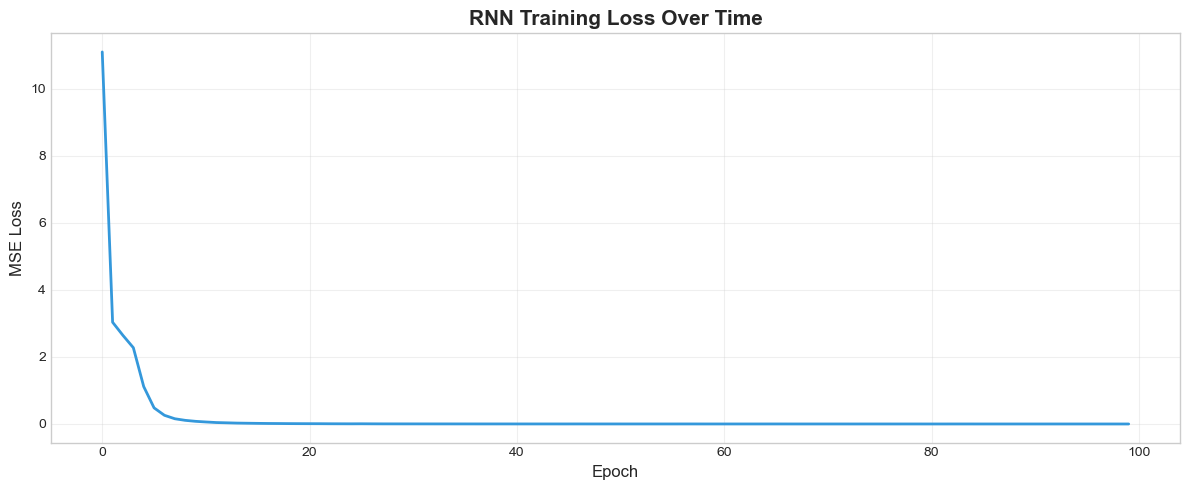


📉 Final Loss: 0.000228
🎯 The RNN learned the pattern!


In [13]:
# Plot training loss
plt.figure(figsize=(12, 5))
plt.plot(losses, linewidth=2, color='#3498db')
plt.title('RNN Training Loss Over Time', fontsize=15, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📉 Final Loss: {losses[-1]:.6f}")
print(f"🎯 The RNN learned the pattern!")

In [14]:
# Test the model
print("\n🧪 TESTING RNN PREDICTIONS\n")
print("="*80)

model.eval()
with torch.no_grad():
    # Test on 5 examples
    test_indices = [0, 1, 2, 3, 4]
    
    print("Sequence                              → Predicted  |  Actual  |  Error")
    print("-" * 80)
    
    for idx in test_indices:
        test_input = X_train_torch[idx:idx+1]
        prediction = model(test_input)
        actual = y_train_torch[idx]
        error = abs(prediction.item() - actual.item())
        
        seq_str = ', '.join([f'{x:.2f}' for x in X_train[idx]])
        print(f"[{seq_str}] → {prediction.item():8.3f} | {actual.item():8.3f} | {error:.4f}")

print("="*80)
print("\n✅ RNN successfully learned the Fibonacci-like pattern!")
print("   It can predict the next number given a sequence!")


🧪 TESTING RNN PREDICTIONS

Sequence                              → Predicted  |  Actual  |  Error
--------------------------------------------------------------------------------
[0.64, 0.03, 0.66, 0.69, 1.35] →    2.080 |    2.043 | 0.0368
[0.28, 0.22, 0.50, 0.72, 1.22] →    1.965 |    1.941 | 0.0242
[0.74, 0.68, 1.41, 2.09, 3.50] →    5.600 |    5.593 | 0.0072
[0.89, 0.09, 0.98, 1.07, 2.05] →    3.134 |    3.111 | 0.0228
[0.42, 0.03, 0.45, 0.48, 0.93] →    1.457 |    1.415 | 0.0424

✅ RNN successfully learned the Fibonacci-like pattern!
   It can predict the next number given a sequence!


### 💡 Key Insights:

✅ **PyTorch RNN** handles sequences automatically

✅ **batch_first=True** makes input (batch, seq, features)

✅ **RNN learns patterns** from sequential data

✅ **Hidden state** managed internally by PyTorch

---

## 📝 Part 5: Character-Level Text Generation

Let's build an RNN that generates text character by character!

In [15]:
# Training text
text_data = """Deep learning is a subset of machine learning that uses neural networks with many layers.
These networks learn representations of data through multiple levels of abstraction.
Recurrent neural networks are particularly good at processing sequential data like text and time series.
They maintain an internal state that allows them to process sequences of inputs.
This makes them ideal for tasks like language modeling and text generation.
Natural language processing helps computers understand and generate human language.
The power of deep learning lies in its ability to automatically learn features from raw data."""

print("📚 TRAINING TEXT FOR CHARACTER RNN\n")
print(text_data[:200] + "...")
print(f"\nTotal characters: {len(text_data)}")

📚 TRAINING TEXT FOR CHARACTER RNN

Deep learning is a subset of machine learning that uses neural networks with many layers.
These networks learn representations of data through multiple levels of abstraction.
Recurrent neural networks...

Total characters: 614


In [16]:
# Create character mappings
chars = sorted(list(set(text_data)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}
vocab_size = len(chars)

print(f"\n📖 VOCABULARY\n")
print(f"Vocabulary size: {vocab_size} unique characters")
print(f"\nCharacters: {''.join(chars[:20])}...")
print(f"\nExample mappings:")
for ch in ['a', 'e', 'i', ' ', '.']:
    print(f"   '{ch}' → {char_to_idx[ch]}")

print("\n✅ Character mappings created!")


📖 VOCABULARY

Vocabulary size: 31 unique characters

Characters: 
 .DNRTabcdefghiklmn...

Example mappings:
   'a' → 7
   'e' → 11
   'i' → 15
   ' ' → 1
   '.' → 2

✅ Character mappings created!


In [17]:
# Prepare sequences
def create_sequences(text, seq_length=25):
    X, y = [], []
    
    for i in range(len(text) - seq_length):
        # Input: sequence of characters
        sequence = text[i:i+seq_length]
        # Target: next character
        target = text[i+seq_length]
        
        # Convert to indices
        X.append([char_to_idx[ch] for ch in sequence])
        y.append(char_to_idx[target])
    
    return np.array(X), np.array(y)

seq_length = 25
X_text, y_text = create_sequences(text_data, seq_length)

print(f"\n📊 SEQUENCE DATA\n")
print(f"Number of sequences: {len(X_text)}")
print(f"Sequence length: {seq_length}")
print(f"\nExample:")
print(f"   Input:  '{''.join([idx_to_char[idx] for idx in X_text[0]])}'")
print(f"   Target: '{idx_to_char[y_text[0]]}'")
print("\n✅ Sequences created!")


📊 SEQUENCE DATA

Number of sequences: 589
Sequence length: 25

Example:
   Input:  'Deep learning is a subset'
   Target: ' '

✅ Sequences created!


In [18]:
# Define Character RNN
class CharRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=32, hidden_size=128, num_layers=2):
        super(CharRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # RNN layer
        self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
        
        # Output layer
        self.fc = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, x, hidden=None):
        # Embed characters
        x = self.embedding(x)
        
        # Initialize hidden if not provided
        if hidden is None:
            hidden = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # RNN forward
        out, hidden = self.rnn(x, hidden)
        
        # Use last time step
        out = self.fc(out[:, -1, :])
        
        return out, hidden

# Create model
char_model = CharRNN(vocab_size, embedding_dim=32, hidden_size=128, num_layers=2).to(device)

print("\n✅ CHARACTER RNN MODEL\n")
print(char_model)
print(f"\nTotal parameters: {sum(p.numel() for p in char_model.parameters()):,}")


✅ CHARACTER RNN MODEL

CharRNN(
  (embedding): Embedding(31, 32)
  (rnn): RNN(32, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=31, bias=True)
)

Total parameters: 58,751


In [19]:
# Prepare data
X_text_torch = torch.LongTensor(X_text).to(device)
y_text_torch = torch.LongTensor(y_text).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(char_model.parameters(), lr=0.002)

print(f"Data ready for training:")
print(f"   X shape: {X_text_torch.shape}")
print(f"   y shape: {y_text_torch.shape}")
print(f"\n✅ Ready to train character RNN!")

Data ready for training:
   X shape: torch.Size([589, 25])
   y shape: torch.Size([589])

✅ Ready to train character RNN!


In [20]:
# Train character RNN
print("\n🔥 TRAINING CHARACTER RNN...\n")

epochs = 200
batch_size = 64
char_losses = []

char_model.train()

for epoch in range(epochs):
    # Shuffle
    indices = torch.randperm(len(X_text_torch))
    
    epoch_loss = 0
    num_batches = 0
    
    for i in range(0, len(X_text_torch), batch_size):
        batch_indices = indices[i:i+batch_size]
        batch_X = X_text_torch[batch_indices]
        batch_y = y_text_torch[batch_indices]
        
        # Forward
        outputs, _ = char_model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        num_batches += 1
    
    avg_loss = epoch_loss / num_batches
    char_losses.append(avg_loss)
    
    if (epoch + 1) % 40 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

print("\n✅ Training complete!")


🔥 TRAINING CHARACTER RNN...

Epoch [40/200], Loss: 0.0473
Epoch [80/200], Loss: 0.0270
Epoch [120/200], Loss: 0.0027
Epoch [160/200], Loss: 0.0015
Epoch [200/200], Loss: 0.0010

✅ Training complete!


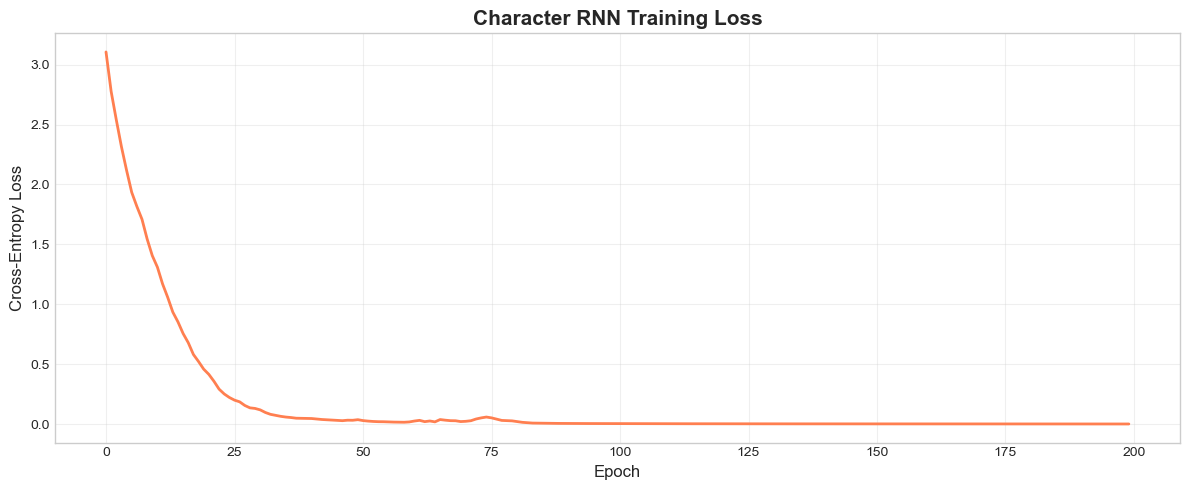


📉 Final Loss: 0.0010


In [21]:
# Plot training loss
plt.figure(figsize=(12, 5))
plt.plot(char_losses, linewidth=2, color='coral')
plt.title('Character RNN Training Loss', fontsize=15, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Cross-Entropy Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📉 Final Loss: {char_losses[-1]:.4f}")

In [22]:
# Generate text function
def generate_text(model, start_string, length=200, temperature=1.0):
    """
    Generate text using trained RNN
    
    temperature: higher = more random, lower = more deterministic
    """
    model.eval()
    
    current_seq = [char_to_idx[ch] for ch in start_string]
    generated = start_string
    
    with torch.no_grad():
        for _ in range(length):
            # Take last seq_length characters
            input_seq = current_seq[-seq_length:]
            
            # Pad if too short
            if len(input_seq) < seq_length:
                input_seq = [0] * (seq_length - len(input_seq)) + input_seq
            
            # Convert to tensor
            x = torch.LongTensor([input_seq]).to(device)
            
            # Get prediction
            output, _ = model(x)
            
            # Apply temperature
            output = output / temperature
            probs = torch.softmax(output, dim=1)
            
            # Sample
            next_idx = torch.multinomial(probs, 1).item()
            next_char = idx_to_char[next_idx]
            
            # Add to sequence
            generated += next_char
            current_seq.append(next_idx)
    
    return generated

print("✅ Text generation function ready!")

✅ Text generation function ready!


In [23]:
# Generate text!
print("\n🎨 GENERATING TEXT WITH DIFFERENT TEMPERATURES\n")
print("="*80)

start_strings = ["Deep learning", "Neural networks"]
temperatures = [0.5, 1.0, 1.5]

for start in start_strings:
    print(f"\n🔤 Starting with: '{start}'\n")
    
    for temp in temperatures:
        generated = generate_text(char_model, start, length=150, temperature=temp)
        print(f"Temperature {temp}:")
        print(generated)
        print()
    
    print("-" * 80)

print("\n💡 Notice:")
print("   • Low temperature (0.5) → More predictable, coherent")
print("   • High temperature (1.5) → More creative, random")
print("\n✅ Character RNN can generate text!")


🎨 GENERATING TEXT WITH DIFFERENT TEMPERATURES


🔤 Starting with: 'Deep learning'

Temperature 0.5:
Deep learning lies in its ability to automatically learn features from raw data.
These networks learn representations of data through multiple levels of abstractio

Temperature 1.0:
Deep learning lies in its ability to automatically learn features from raw data.
These networks learn representations of data through multiple levels of abstractio

Temperature 1.5:
Deep learning lies in its ability to automatically learn features from ras froppraces intes of i
preplivtial data like text and time series.
They maintain an inter

--------------------------------------------------------------------------------

🔤 Starting with: 'Neural networks'

Temperature 0.5:
Neural networks are particularly good at processing sequential data like text and time series.
They maintain an internal state that allows them to process sequences 

Temperature 1.0:
Neural networks with many layers.
These networks lea

### 💡 Key Insights:

✅ **Character-level RNN** learns language patterns

✅ **Temperature controls** creativity vs coherence

✅ **Embedding layer** converts characters to vectors

✅ **Autoregressive generation** - one character at a time

✅ **More data = better results!**

---

## 📚 Summary

### What We Learned:

**1. Sequential Data:**
- Order matters in sequences
- Context from past helps predict future
- Time dependencies are critical

**2. RNN From Scratch:**
- Hidden state carries information forward
- Same weights at every time step
- Forward pass processes step-by-step

**3. RNN in PyTorch:**
- Built-in nn.RNN simplifies implementation
- batch_first=True for convenient shapes
- Trained RNN for sequence prediction

**4. Character-Level Generation:**
- Embedding layer for characters
- RNN learns language structure
- Temperature controls generation

### 🎯 Key Takeaways:

✅ RNNs designed for sequential data

✅ Hidden state = network's "memory"

✅ PyTorch makes RNN implementation easy

✅ RNNs learn complex temporal patterns

### ⚠️ Limitations:

❌ Vanishing gradient with long sequences

❌ Sequential processing (can't parallelize)

❌ Struggles with long-term dependencies

**Solution: LSTMs & GRUs (tomorrow!)** 🚀

---

## 🎉 Congratulations!

You've completed Day 2! You now understand:
- ✅ How RNNs process sequences
- ✅ How to build RNNs in PyTorch
- ✅ How to generate text with RNNs

**Tomorrow: LSTMs and GRUs solve RNN limitations!**